# Consider ‘CitiBank’ data set

**Problem statement:**
Predict defaulters based on various parameters.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split

import statsmodels.api as sm

from scipy import stats
from sklearn import metrics

%matplotlib inline

C:\Users\TARUN AERVA TEJA\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns

In [4]:
from sklearn import cross_validation, preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from patsy import dmatrices

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [1]:
pwd()

'F:\\DSE\\Classification'

In [6]:
data1 = pd.read_csv('train_1.csv')
data2 = pd.read_csv('train_2.csv')

In [7]:
data = pd.merge(data1,data2)

In [8]:
data.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y,X8,X9,X10,X11,X12,X13,X14,X15
0,22203,320000,2,1,2,27,1,2,1,2,2,2,2,43243,42537,41370,40694
1,1288,470000,1,2,1,41,-2,-2,0,-2,-2,-2,-1,13780,12242,32463,20621
2,11822,20000,1,2,2,25,1,2,0,0,0,0,0,20415,18266,18921,19297
3,15085,80000,1,3,1,41,0,0,1,0,0,0,-1,76015,77582,60311,62471
4,6192,30000,1,1,2,30,1,-2,1,-2,-2,-2,-2,0,0,0,0


In [9]:
data = data.drop(labels = 'Ref.No',axis = 1)

In [10]:
data.columns = ['given_cred','gender','edu','marital_stat','age','sep','aug','behaviour','july','june','may','april','bill_sep','bill_aug','bill_july','bill_june']

In [11]:
data.head()

,given_cred,gender,edu,marital_stat,age,sep,aug,behaviour,july,june,may,april,bill_sep,bill_aug,bill_july,bill_june
0,320000,2,1,2,27,1,2,1,2,2,2,2,43243,42537,41370,40694
1,470000,1,2,1,41,-2,-2,0,-2,-2,-2,-1,13780,12242,32463,20621
2,20000,1,2,2,25,1,2,0,0,0,0,0,20415,18266,18921,19297
3,80000,1,3,1,41,0,0,1,0,0,0,-1,76015,77582,60311,62471
4,30000,1,1,2,30,1,-2,1,-2,-2,-2,-2,0,0,0,0


In [12]:
data.shape

(21600, 16)

# data_com is the complete dataset with all the train datasets

In [183]:
data_com = pd.concat([data,data3],axis = 1)

In [184]:
data_com

,given_cred,gender,edu,marital_stat,age,sep,aug,behaviour,july,june,...,bill_july,bill_june,bill_may,bill_april,paid_sep,paid_aug,paid_july,paid_june,paid_may,paid_april
0,320000,2,1,2,27,1,2,1,2,2,...,41370,40694,39606,38680,2000,1500,2000,1500,1500,0
1,470000,1,2,1,41,-2,-2,0,-2,-2,...,32463,20621,13711,8294,12300,32520,34,68,8334,45684
2,20000,1,2,2,25,1,2,0,0,0,...,18921,19297,18926,17717,1264,1249,625,700,1000,1000
3,80000,1,3,1,41,0,0,1,0,0,...,60311,62471,21071,2099,3008,3000,5000,10000,2099,0
4,30000,1,1,2,30,1,-2,1,-2,-2,...,0,0,0,0,0,0,0,0,0,0
5,320000,2,2,1,39,0,0,0,0,0,...,131816,120761,120375,120897,5009,6125,4001,4013,5000,4015
6,50000,2,3,1,37,2,0,1,0,0,...,40352,41183,42221,42935,2000,1700,1500,1700,1568,7400
7,360000,1,1,2,34,1,-2,0,-2,-2,...,0,0,0,150,0,0,0,0,150,59
8,50000,2,1,1,25,0,0,0,0,0,...,13008,12540,10746,8482,1500,1433,1465,0,500,1000
9,30000,2,2,1,45,2,0,0,0,0,...,31237,13511,13781,14070,1665,1676,1223,493,511,514


In [185]:
data_com[['given_cred','age','bill_sep','bill_aug','bill_july','bill_june','bill_may','bill_april','paid_sep','paid_aug','paid_july','paid_june','paid_may','paid_april']].describe().T

,count,mean,std,min,25%,50%,75%,max
given_cred,21600.0,165235.818519,129013.755215,10000.0,50000.00,140000.0,230000.00,1000000.0
age,21600.0,35.382361,9.266769,21.0,28.00,34.0,41.00,79.0
bill_sep,21600.0,50382.807546,72570.827360,-165580.0,3633.75,22182.0,65073.25,964511.0
bill_aug,21600.0,48332.562407,70167.264656,-69777.0,3102.00,21095.5,61886.75,983931.0
bill_july,21600.0,46078.883009,68120.766812,-157264.0,2778.00,19978.0,58792.75,1664089.0
bill_june,21600.0,42103.725417,62928.222402,-170000.0,2311.50,18893.0,51549.00,891586.0
bill_may,21600.0,39752.848102,60260.533664,-81334.0,1690.75,18019.0,49464.00,927171.0
bill_april,21600.0,38252.447222,58985.695010,-339603.0,1195.00,16845.0,48470.00,961664.0
paid_sep,21600.0,5496.287315,14951.048697,0.0,1000.00,2100.0,5000.00,505000.0
paid_aug,21600.0,5746.915231,20773.786348,0.0,827.00,2000.0,5000.00,1684259.0


# So, the taraget variable is the behaviour variable which tells if defaulter the value is 1 and if not the value is 0

In [173]:
data_com.isnull().any()

given_cred      False
gender          False
edu             False
marital_stat    False
age             False
sep             False
aug             False
behaviour       False
july            False
june            False
may             False
april           False
bill_sep        False
bill_aug        False
bill_july       False
bill_june       False
bill_may        False
bill_april      False
paid_sep        False
paid_aug        False
paid_july       False
paid_june       False
paid_may        False
paid_april      False
dtype: bool

In [187]:
data_com[['given_cred','age','bill_sep','bill_aug','bill_july','bill_june','bill_may','bill_april','paid_sep','paid_aug','paid_july','paid_june','paid_may','paid_april']].describe().T

,count,mean,std,min,25%,50%,75%,max
given_cred,21600.0,165235.818519,129013.755215,10000.0,50000.00,140000.0,230000.00,1000000.0
age,21600.0,35.382361,9.266769,21.0,28.00,34.0,41.00,79.0
bill_sep,21600.0,50382.807546,72570.827360,-165580.0,3633.75,22182.0,65073.25,964511.0
bill_aug,21600.0,48332.562407,70167.264656,-69777.0,3102.00,21095.5,61886.75,983931.0
bill_july,21600.0,46078.883009,68120.766812,-157264.0,2778.00,19978.0,58792.75,1664089.0
bill_june,21600.0,42103.725417,62928.222402,-170000.0,2311.50,18893.0,51549.00,891586.0
bill_may,21600.0,39752.848102,60260.533664,-81334.0,1690.75,18019.0,49464.00,927171.0
bill_april,21600.0,38252.447222,58985.695010,-339603.0,1195.00,16845.0,48470.00,961664.0
paid_sep,21600.0,5496.287315,14951.048697,0.0,1000.00,2100.0,5000.00,505000.0
paid_aug,21600.0,5746.915231,20773.786348,0.0,827.00,2000.0,5000.00,1684259.0


## (Above) Age and given_cred are skewed(towards right). But, the bills for sep,aug,july and june are very highly right skewed.

In [188]:
data_com.groupby('behaviour').count()

,given_cred,gender,edu,marital_stat,age,sep,aug,july,june,may,...,bill_july,bill_june,bill_may,bill_april,paid_sep,paid_aug,paid_july,paid_june,paid_may,paid_april
behaviour,,,,,,,,,,,,,,,,,,,,,
0,16766,16766,16766,16766,16766,16766,16766,16766,16766,16766,...,16766,16766,16766,16766,16766,16766,16766,16766,16766,16766
1,4834,4834,4834,4834,4834,4834,4834,4834,4834,4834,...,4834,4834,4834,4834,4834,4834,4834,4834,4834,4834


# Here(above), we can see that a large proportion(77%) are non-defaulters and have a good profile with the bank

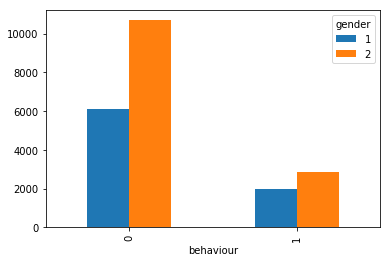

In [197]:
pd.crosstab(data_com.behaviour, data_com.gender).plot(kind='bar');

In [176]:
pd.crosstab(data_com.behaviour, data_com.gender,normalize = 'index')

gender,1,2
behaviour,,
0,0.362997,0.637003
1,0.407737,0.592263


## (Above)We have more female than male with a bad behaviour(defaulters) and also, within the non-defaulters, we have a same case wherein there are more females. So, on a complete scale, we can say that, there are more female records than male and the proportion of the defaulters are more in female.

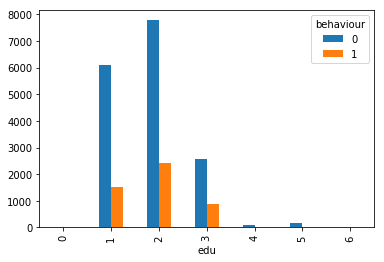

In [190]:
pd.crosstab(data_com.edu, data_com.behaviour).plot(kind='bar');

1. Graduate school
2. University 
3. High school
0,4,5,6. Others
# So, the citibank has more clients who study in the universities and also, defaulters are more from the universities followed by the colleges.


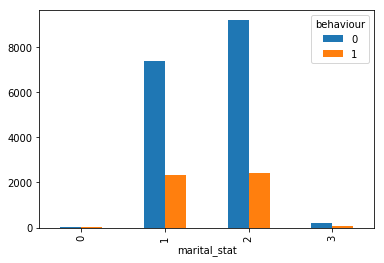

In [191]:
pd.crosstab(data_com.marital_stat, data_com.behaviour).plot(kind='bar');

## (Above)There are many clients who are not married(2). Even though the married to singles ratio is less than 1, we can see that there are equal number of defaulters in both of these categories are same.

In [179]:
def draw_hist(data, X, title):
    sns.distplot(data[X]).set_title(title)
    plt.show()

C:\Users\TARUN AERVA TEJA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


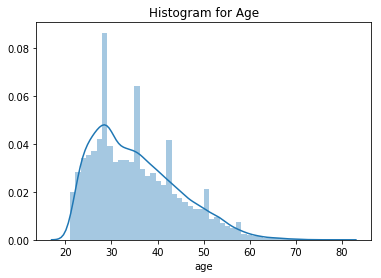

In [180]:
draw_hist(data_com, 'age', 'Histogram for Age')

C:\Users\TARUN AERVA TEJA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


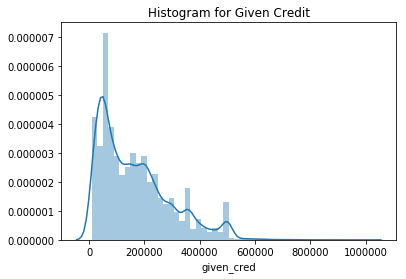

In [181]:
draw_hist(data_com, 'given_cred', 'Histogram for Given Credit')

# Age and given_cred are skewed(towards right)

In [182]:
data_com['behaviour'].value_counts()

0    16766
1     4834
Name: behaviour, dtype: int64

# Target variable with two classes are almost distributed with 77.62% for class 0 and 22.38% for class 1.

# Classification

# **1. Decision Tree**

In [24]:
data.head()

,given_cred,gender,edu,marital_stat,age,sep,aug,behaviour,july,june,may,april,bill_sep,bill_aug,bill_july,bill_june
0,320000,2,1,2,27,1,2,1,2,2,2,2,43243,42537,41370,40694
1,470000,1,2,1,41,-2,-2,0,-2,-2,-2,-1,13780,12242,32463,20621
2,20000,1,2,2,25,1,2,0,0,0,0,0,20415,18266,18921,19297
3,80000,1,3,1,41,0,0,1,0,0,0,-1,76015,77582,60311,62471
4,30000,1,1,2,30,1,-2,1,-2,-2,-2,-2,0,0,0,0


In [25]:
response = data[['behaviour']]

**Scaling the Data**

In [26]:
data_z = data.apply(zscore)
data_z

,given_cred,gender,edu,marital_stat,age,sep,aug,behaviour,july,june,may,april,bill_sep,bill_aug,bill_july,bill_june
0,1.199622,0.771310,-1.082964,0.845402,-0.904582,0.890581,1.767277,1.862350,1.791855,1.899712,1.981181,1.969132,-0.098386,-0.082598,-0.069127,-0.022403
1,2.362316,-1.296495,0.197247,-1.070322,0.606227,-1.773392,-1.560885,-0.536956,-1.530739,-1.532139,-1.534625,-0.621673,-0.504385,-0.514362,-0.199883,-0.341392
2,-1.125765,-1.296495,0.197247,0.845402,-1.120412,0.890581,1.767277,-0.536956,0.130558,0.183787,0.223278,0.241928,-0.412955,-0.428508,-0.398682,-0.362433
3,-0.660688,-1.296495,1.477459,-1.070322,0.606227,0.002590,0.103196,1.862350,0.130558,0.183787,0.223278,-0.621673,0.353211,0.416863,0.208930,0.323666
4,-1.048252,-1.296495,-1.082964,0.845402,-0.580837,0.890581,-1.560885,1.862350,-1.530739,-1.532139,-1.534625,-1.485275,-0.694273,-0.688835,-0.676445,-0.669091
5,1.199622,0.771310,0.197247,-1.070322,0.390397,0.002590,0.103196,-0.536956,0.130558,0.183787,0.223278,0.241928,1.337444,1.277056,1.258634,1.249981
6,-0.893226,0.771310,1.477459,-1.070322,0.174567,1.778572,0.103196,1.862350,0.130558,0.183787,0.223278,0.241928,-0.163373,-0.124328,-0.084072,-0.014632
7,1.509674,-1.296495,-1.082964,0.845402,-0.149177,0.890581,-1.560885,-0.536956,-1.530739,-1.532139,-1.534625,-0.621673,-0.694273,-0.688835,-0.676445,-0.669091
8,-0.893226,0.771310,-1.082964,-1.070322,-1.120412,0.002590,0.103196,-0.536956,0.130558,0.183787,1.981181,0.241928,-0.538229,-0.520505,-0.485486,-0.469812
9,-1.048252,0.771310,0.197247,-1.070322,1.037887,1.778572,0.103196,-0.536956,0.130558,0.183787,0.223278,0.241928,-0.259543,-0.258055,-0.217881,-0.454381


In [27]:
data_z = data_z.drop(labels = 'behaviour', axis = 1)

In [28]:
data_z

,given_cred,gender,edu,marital_stat,age,sep,aug,july,june,may,april,bill_sep,bill_aug,bill_july,bill_june
0,1.199622,0.771310,-1.082964,0.845402,-0.904582,0.890581,1.767277,1.791855,1.899712,1.981181,1.969132,-0.098386,-0.082598,-0.069127,-0.022403
1,2.362316,-1.296495,0.197247,-1.070322,0.606227,-1.773392,-1.560885,-1.530739,-1.532139,-1.534625,-0.621673,-0.504385,-0.514362,-0.199883,-0.341392
2,-1.125765,-1.296495,0.197247,0.845402,-1.120412,0.890581,1.767277,0.130558,0.183787,0.223278,0.241928,-0.412955,-0.428508,-0.398682,-0.362433
3,-0.660688,-1.296495,1.477459,-1.070322,0.606227,0.002590,0.103196,0.130558,0.183787,0.223278,-0.621673,0.353211,0.416863,0.208930,0.323666
4,-1.048252,-1.296495,-1.082964,0.845402,-0.580837,0.890581,-1.560885,-1.530739,-1.532139,-1.534625,-1.485275,-0.694273,-0.688835,-0.676445,-0.669091
5,1.199622,0.771310,0.197247,-1.070322,0.390397,0.002590,0.103196,0.130558,0.183787,0.223278,0.241928,1.337444,1.277056,1.258634,1.249981
6,-0.893226,0.771310,1.477459,-1.070322,0.174567,1.778572,0.103196,0.130558,0.183787,0.223278,0.241928,-0.163373,-0.124328,-0.084072,-0.014632
7,1.509674,-1.296495,-1.082964,0.845402,-0.149177,0.890581,-1.560885,-1.530739,-1.532139,-1.534625,-0.621673,-0.694273,-0.688835,-0.676445,-0.669091
8,-0.893226,0.771310,-1.082964,-1.070322,-1.120412,0.002590,0.103196,0.130558,0.183787,1.981181,0.241928,-0.538229,-0.520505,-0.485486,-0.469812
9,-1.048252,0.771310,0.197247,-1.070322,1.037887,1.778572,0.103196,0.130558,0.183787,0.223278,0.241928,-0.259543,-0.258055,-0.217881,-0.454381


In [29]:
features = np.array(data_z[['given_cred','gender','edu','marital_stat','age','sep','aug','july','june','may','april','bill_sep','bill_aug','bill_july','bill_june']])
label = np.array(response["behaviour"])

In [30]:
X_Train, X_Test,Y_Train, Y_Test = cross_validation.train_test_split(features, label, test_size=0.2, random_state=0)

In [31]:
X_Train.shape, Y_Train.shape, X_Test.shape, Y_Test.shape

((17280, 15), (17280,), (4320, 15), (4320,))

**Loading the test file data**

In [32]:
test_data  = pd.read_csv('test.csv')

In [33]:
test_vars = test_data.iloc[:,1:16]

In [34]:
test_vars_z = np.array(test_vars.apply(zscore))
test_vars_z

array([[-0.90584112,  0.75024426, -1.11905707, ..., -0.09394702,
        -0.13050675, -0.10512245],
       [-0.36796092,  0.75024426,  0.18037077, ..., -0.54520968,
        -0.54097848, -0.59110518],
       [-0.36796092,  0.75024426,  0.18037077, ..., -0.71450776,
        -0.67729852, -0.6962586 ],
       ...,
       [-0.90584112,  0.75024426,  0.18037077, ..., -0.10955853,
        -0.15637835, -0.493666  ],
       [ 0.16991928,  0.75024426,  0.18037077, ..., -0.64948064,
        -0.63257555, -0.59961263],
       [-0.75216106, -1.33289923,  0.18037077, ..., -0.4174035 ,
        -0.38580706, -0.33157326]])

In [35]:
test_pred = np.array(test_data.iloc[:,[24]])

In [36]:
test_pred

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [37]:
from sklearn.tree import DecisionTreeClassifier

DTClassifier = DecisionTreeClassifier (max_depth=3, min_samples_split = 3, random_state = 0)
# Your code here
# DTClassifier.fit (# Your code here, # Your code here)
#Hint: 
DTClassifier.fit (X_Train,Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [38]:
predicted_labels = DTClassifier.predict(X_Test)

In [39]:
score = accuracy_score(Y_Test, predicted_labels)
print(score)

0.8185185185185185


In [40]:
DTClassifier_new = DecisionTreeClassifier (max_depth=3, criterion = "entropy",min_samples_leaf=5,random_state = 0)
DTClassifier_new.fit(X_Train, Y_Train)
predicted_labels1 = DTClassifier_new.predict(X_Test)
accuracy_score_new = accuracy_score(Y_Test, predicted_labels1)
print(accuracy_score_new)

0.8185185185185185


**Now,using the test file data**

In [41]:
DTClassifier_new2 = DecisionTreeClassifier (max_depth=3, criterion = "entropy",min_samples_leaf=5,random_state = 0)
DTClassifier_new2.fit(X_Train, Y_Train)
predicted_labels2 = DTClassifier_new2.predict(test_vars_z)

In [42]:
sub = pd.DataFrame(pd.read_csv("test.csv")['Ref.No'])
sub['Y'] = predicted_labels2
sub.to_csv("Comp1.csv", index = False)

Accuracy is 0.81408

# 2. K-Nearest Neighbor Method

In [43]:
for i in range(1,25,2):
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'uniform', metric='euclidean')
    NNH.fit(X_Train, Y_Train)
    predicted_labels = NNH.predict(X_Test)
    accuracy_score1 = accuracy_score(Y_Test, predicted_labels)
    print(i,accuracy_score1)

1 0.7287037037037037
3 0.7736111111111111
5 0.7949074074074074
7 0.8046296296296296
9 0.8099537037037037
11 0.8099537037037037
13 0.8113425925925926
15 0.812037037037037
17 0.8131944444444444
19 0.8138888888888889
21 0.8162037037037037
23 0.8152777777777778


In [44]:
NNH = KNeighborsClassifier(n_neighbors= 21,weights = 'uniform', metric='euclidean')
NNH.fit(X_Train, Y_Train)
predicted_labels3 = NNH.predict(X_Test)
accuracy_score_best1 = accuracy_score(Y_Test, predicted_labels3)
print(accuracy_score_best1)

0.8162037037037037


In [45]:
NNH = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
NNH.fit(X_Train, Y_Train)
predicted_labels4 = NNH.predict(test_vars_z)

In [46]:
sub = pd.DataFrame(pd.read_csv("test.csv")['Ref.No'])
sub['Y'] = predicted_labels4
sub.to_csv("Comp2.csv", index = False)

Accuracy is 0.80616

In [47]:
from imblearn.over_sampling import SMOTE
smote =SMOTE(ratio=1.0)
x_sm , y_sm = smote.fit_sample(X_Train, Y_Train)
NNH.fit(x_sm, y_sm)

C:\Users\TARUN AERVA TEJA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [48]:
predicted_labels5 = NNH.predict(test_vars_z)

In [49]:
sub = pd.DataFrame(pd.read_csv("test.csv")['Ref.No'])
sub['Y'] = predicted_labels5
sub.to_csv("Comp4.csv", index = False)

Accuracy is 0.6486

# 3.Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression


In [51]:
logreg = LogisticRegression()
logreg.fit(data_z, response)

C:\Users\TARUN AERVA TEJA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
logit = sm.Logit( response, sm.add_constant( data_z ) )
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.471722
         Iterations 6


In [53]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:              behaviour   No. Observations:                21600
Model:                          Logit   Df Residuals:                    21584
Method:                           MLE   Df Model:                           15
Date:                Tue, 06 Nov 2018   Pseudo R-squ.:                  0.1128
Time:                        09:49:21   Log-Likelihood:                -10189.
converged:                       True   LL-Null:                       -11484.
                                        LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.4145      0.019    -75.920      0.000      -1.451      -1.378
given_cred      -0.1538      0.023     -6.673      0.000      -0.199      -0.109
gender          -0.0400      0.018     -2.27

In [54]:
pred = logreg.predict(test_vars_z)

In [55]:
sub = pd.DataFrame(pd.read_csv("test.csv")['Ref.No'])
sub['Y'] = pred
sub.to_csv("Comp5.csv", index = False)

Accuracy is 0.8053

In [56]:
pwd()

'F:\\DSE\\Classification'

# This is the classification with all the 3 train datasets

**Loading the 3rd train data set**

In [57]:
data3 = pd.read_csv('train_3.csv')

In [61]:
data3 = data3.drop(labels = 'Ref.No',axis = 1)

In [63]:
data3_z = data3.apply(zscore)

In [64]:
data3_z

,X16,X17,X18,X19,X20,X21,X22,X23
0,-0.002437,0.007249,-0.233854,-0.204441,-0.181426,-0.214096,-0.212969,-0.295981
1,-0.432164,-0.507905,0.455076,1.288822,-0.301621,-0.308090,0.232078,2.310904
2,-0.345621,-0.348151,-0.283083,-0.216524,-0.265489,-0.266606,-0.245531,-0.238918
3,-0.310025,-0.612933,-0.166433,-0.132233,0.001985,0.343829,-0.173961,-0.295981
4,-0.659698,-0.648519,-0.367627,-0.276649,-0.303700,-0.312553,-0.310653,-0.295981
5,1.337924,1.401127,-0.032593,0.018201,-0.059091,-0.049147,0.014960,-0.066872
6,0.040959,0.079386,-0.233854,-0.194813,-0.211994,-0.200968,-0.208541,0.126288
7,-0.659698,-0.645976,-0.367627,-0.276649,-0.303700,-0.312553,-0.300885,-0.292614
8,-0.481368,-0.504718,-0.267298,-0.207666,-0.214134,-0.312553,-0.278092,-0.238918
9,-0.431003,-0.409981,-0.256261,-0.195969,-0.228929,-0.280194,-0.277376,-0.266651


In [67]:
data3_z.columns = ['bill_may','bill_april','paid_sep','paid_aug','paid_july','paid_june','paid_may','paid_april']

In [68]:
data3_z

,bill_may,bill_april,paid_sep,paid_aug,paid_july,paid_june,paid_may,paid_april
0,-0.002437,0.007249,-0.233854,-0.204441,-0.181426,-0.214096,-0.212969,-0.295981
1,-0.432164,-0.507905,0.455076,1.288822,-0.301621,-0.308090,0.232078,2.310904
2,-0.345621,-0.348151,-0.283083,-0.216524,-0.265489,-0.266606,-0.245531,-0.238918
3,-0.310025,-0.612933,-0.166433,-0.132233,0.001985,0.343829,-0.173961,-0.295981
4,-0.659698,-0.648519,-0.367627,-0.276649,-0.303700,-0.312553,-0.310653,-0.295981
5,1.337924,1.401127,-0.032593,0.018201,-0.059091,-0.049147,0.014960,-0.066872
6,0.040959,0.079386,-0.233854,-0.194813,-0.211994,-0.200968,-0.208541,0.126288
7,-0.659698,-0.645976,-0.367627,-0.276649,-0.303700,-0.312553,-0.300885,-0.292614
8,-0.481368,-0.504718,-0.267298,-0.207666,-0.214134,-0.312553,-0.278092,-0.238918
9,-0.431003,-0.409981,-0.256261,-0.195969,-0.228929,-0.280194,-0.277376,-0.266651


In [74]:
data_new = pd.concat([data_z,data3_z],axis = 1)

In [77]:
data_new.shape

(21600, 23)

In [79]:
data_new.head().T

,0,1,2,3,4
given_cred,1.199622,2.362316,-1.125765,-0.660688,-1.048252
gender,0.771310,-1.296495,-1.296495,-1.296495,-1.296495
edu,-1.082964,0.197247,0.197247,1.477459,-1.082964
marital_stat,0.845402,-1.070322,0.845402,-1.070322,0.845402
age,-0.904582,0.606227,-1.120412,0.606227,-0.580837
sep,0.890581,-1.773392,0.890581,0.002590,0.890581
aug,1.767277,-1.560885,1.767277,0.103196,-1.560885
july,1.791855,-1.530739,0.130558,0.130558,-1.530739
june,1.899712,-1.532139,0.183787,0.183787,-1.532139
may,1.981181,-1.534625,0.223278,0.223278,-1.534625


In [162]:
data3.columns= ['bill_may','bill_april','paid_sep','paid_aug','paid_july','paid_june','paid_may','paid_april']

In [157]:
data_new[['given_cred','age','bill_sep','bill_aug','bill_july','bill_june','bill_may','bill_april','paid_sep','paid_aug','paid_july','paid_june','paid_may','paid_april']].describe().T

,count,mean,std,min,25%,50%,75%,max
given_cred,21600.0,-6.885439e-17,1.000023,-1.203278,-0.893226,-0.195610,0.502006,6.470500
age,21600.0,7.243229e-16,1.000023,-1.552072,-0.796667,-0.149177,0.606227,4.706996
bill_sep,21600.0,-4.851058e-17,1.000023,-2.975959,-0.644200,-0.388606,0.202434,12.596651
bill_aug,21600.0,1.875146e-16,1.000023,-1.683296,-0.644626,-0.388182,0.193174,13.334140
bill_july,21600.0,-1.981954e-16,1.000023,-2.985104,-0.635664,-0.383165,0.186641,23.752633
bill_june,21600.0,-1.516123e-16,1.000023,-3.370644,-0.632358,-0.368853,0.150099,13.499538
bill_may,21600.0,2.509361e-16,1.000023,-2.009435,-0.631640,-0.360673,0.161157,14.726698
bill_april,21600.0,3.700743e-18,1.000023,-6.406031,-0.628259,-0.362934,0.173225,15.655201
paid_sep,21600.0,-1.042042e-16,1.000023,-0.367627,-0.300741,-0.227166,-0.033195,33.410049
paid_aug,21600.0,5.119516e-16,1.000023,-0.276649,-0.236838,-0.180372,-0.035956,80.801396


**Loading the test data set considering all the columns**

In [86]:
test_data  = pd.read_csv('test.csv')

In [92]:
test_vars = test_data.iloc[:,1:24]

In [93]:
test_vars

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,50000,2,1,2,25,0,0,0,0,0,...,40002,38008,31898,20154,2000,5040,8034,3029,5000,49436
1,120000,2,2,2,24,0,0,0,0,0,...,11761,6761,7189,1087,1400,1000,0,1000,1087,801
2,120000,2,2,2,27,1,-2,-1,-1,-2,...,2382,0,0,0,0,2382,0,0,0,0
3,60000,1,1,2,28,0,-1,0,0,-1,...,13421,9900,310,160,6000,10000,900,310,0,3400
4,100000,2,1,2,28,3,2,0,0,2,...,49899,53407,51951,53195,0,1831,4339,0,2083,1939
5,290000,2,2,1,34,0,0,0,0,0,...,18231,18593,18986,19967,1292,1303,665,692,1300,636
6,130000,2,2,1,48,2,2,2,2,2,...,109965,110797,107529,114104,5500,5400,4100,0,8500,0
7,20000,1,2,1,40,1,2,0,0,0,...,18867,19253,20003,19470,0,1146,532,900,781,0
8,360000,1,2,2,28,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
9,170000,2,1,1,38,-1,-1,-2,-2,-2,...,0,0,0,3001,0,0,0,0,3001,9436


In [94]:
test_vars_z = np.array(test_vars.apply(zscore))
test_vars_z

array([[-0.90584112,  0.75024426, -1.11905707, ..., -0.13820801,
         0.0066075 ,  2.38299096],
       [-0.36796092,  0.75024426,  0.18037077, ..., -0.31890516,
        -0.26364029, -0.23781715],
       [-0.36796092,  0.75024426,  0.18037077, ..., -0.4079624 ,
        -0.33871296, -0.28098086],
       ...,
       [-0.90584112,  0.75024426,  0.18037077, ..., -0.35452806,
        -0.2972745 , -0.24864849],
       [ 0.16991928,  0.75024426,  0.18037077, ..., -0.31890516,
        -0.20058478, -0.17320629],
       [-0.75216106, -1.33289923,  0.18037077, ..., -0.33181846,
        -0.27759124, -0.21998045]])

In [95]:
test_pred = np.array(test_data.iloc[:,[24]])

In [96]:
features1 = np.array(data_new[['given_cred','gender','edu','marital_stat','age','sep','aug','july','june','may','april','bill_sep','bill_aug','bill_july','bill_june','bill_may','bill_april','paid_sep','paid_aug','paid_july','paid_june','paid_may','paid_april']])
label1 = np.array(response["behaviour"])

In [97]:
X_Train1, X_Test1,Y_Train1, Y_Test1 = cross_validation.train_test_split(features1, label1, test_size=0.2, random_state=0)

In [110]:
from sklearn.tree import DecisionTreeClassifier

DTClassifier = DecisionTreeClassifier (max_depth=3, min_samples_split =3, random_state = 0)
# Your code here
# DTClassifier.fit (# Your code here, # Your code here)
#Hint: 
DTClassifier.fit (X_Train1,Y_Train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [111]:
predicted_labels_new = DTClassifier.predict(X_Test1)

In [112]:
score = accuracy_score(Y_Test1, predicted_labels_new)
print(score)

0.8201388888888889


In [155]:
DTClassifier_new3 = DecisionTreeClassifier (max_depth=3, criterion = "gini",min_samples_leaf=5,random_state = 0)
DTClassifier_new3.fit(X_Train1, Y_Train1)
predicted_labels_new1 = DTClassifier_new3.predict(test_vars_z)

In [114]:
sub = pd.DataFrame(pd.read_csv("test.csv")['Ref.No'])
sub['Y'] = predicted_labels_new1
sub.to_csv("Comp6.csv", index = False)

Accuracy for the test dataset is 0.81408

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [121]:
model = GaussianNB()
model.fit(X_Train1, Y_Train1)

GaussianNB(priors=None)

In [122]:
expected = Y_Test1
predicted = model.predict(X_Test1)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.88      0.75      0.81      3363
          1       0.42      0.64      0.50       957

avg / total       0.78      0.72      0.74      4320

[[2512  851]
 [ 347  610]]


**This is the precission and the sensitivity of the training dataset**

**Using the K-Neighbhor method**

In [129]:
for i in range(1,25,2):
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'uniform', metric='euclidean',p=3)
    NNH.fit(X_Train1, Y_Train1)
    predicted_labels_new2 = NNH.predict(X_Test1)
    accuracy_score1 = accuracy_score(Y_Test1, predicted_labels_new2)
    print(i,accuracy_score1)

1 0.7252314814814815
3 0.7710648148148148
5 0.7951388888888888
7 0.8025462962962963
9 0.8085648148148148
11 0.812037037037037
13 0.8138888888888889
15 0.8127314814814814
17 0.8155092592592592
19 0.8157407407407408
21 0.8152777777777778
23 0.8152777777777778


**We are getting the maximum accuracy when the k value is 19. So based on this model we predicted for the test model**

In [127]:
NNH = KNeighborsClassifier(n_neighbors= 19 , weights = 'uniform', metric='euclidean')
NNH.fit(X_Train1, Y_Train1)
predicted_labels_new2 = NNH.predict(test_vars_z)
    

In [128]:
sub = pd.DataFrame(pd.read_csv("test.csv")['Ref.No'])
sub['Y'] = predicted_labels_new2
sub.to_csv("Comp7.csv", index = False)

# The accuracy for the complete data file is maximum when using the DT classifier with a percentage of 81.408 which is less than the percentage obtained by doing the classification with the training files train_1 and train_2.